# Intro

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%cd /content/drive/MyDrive/SIG GRD

/content/drive/MyDrive/SIG GRD


In [5]:
archivo = pd.read_excel('FINAL RECURSOS/Matriz/Matriz_Shancayan_lote.xlsx', sheet_name=None)
print(archivo.keys())

dict_keys(['Mapa_BD', 'Resumen', 'Tabla', 'Marco Teorico', '4 x 4', '6 x 6', '7 x 7', '8 x 8', 'NORMALIZACION', 'Factores_S_E_A', 'Parámetros', 'Social_Descriptores', 'Económico_Descriptores', 'Ambiental_Descriptores', 'valores', 'Hoja4', 'LEYENDA_SIG', 'NIVEL', 'RIESGO', 'NIVELES DE RIESGO', 'GRAFICO_DINAMICO_RIESGO', 'TABLA RESUMEN RIESGO', 'RIESGO_POR_LOTE', 'LEYENDAS', 'PRUEBA_LOTE', 'LOTES_TABLA', 'areas_lotes', 'dinamica tabla lotes', 'Hoja3', 'GRAFICO_VALORACION', 'RIESGO_VALORACION', 'Hoja1', 'Hoja2', 'Map'])


In [39]:
def calculo_ponderacion(df, columnas, ponderadores, titulo):
    df[titulo] = 0.0 #aqui creo columna nueva con 0
    for col, ponderador in zip(columnas, ponderadores):
      #multiplica el valor de cada por el ponderado, los nan son 0
        df[titulo] += df[col].fillna(0) * ponderador

    return df

In [43]:
def calculo_ponderacion_total(df, columnas, ponderadores, titulo):
    df[titulo] = 0.0

    for col, ponderador in zip(columnas, ponderadores):
        # multiplica el valor de cada por el ponderado, los nan son 0
        df[titulo] += df[col].fillna(0) * ponderador

    #para grupo etario, toma en cuenta personas, se suma cada fila
    suma_fila = df[columnas].sum(axis=1)
    # como vamos a dividir, los 0 seran NAN
    suma_fila = suma_fila.replace(0, pd.NA)
    #sumaproducto/suma
    df[titulo] = df[titulo] / suma_fila
    # Reemplazar NaN por 0
    df[titulo] = df[titulo].fillna(0)

    return df

# Peligro

## Abriendo archivos

In [81]:
geomorfo_shape =  gpd.read_file("FINAL RECURSOS/Shape/Geomorfologia.shp")
geomorfo_shape

,OBJECTID,GEOMORFOLO,Pel_gemf,geometry
0,1,Cauce de quebrada Quinuacocha,0.487,"POLYGON ((222255.508 8947416.222, 222255.582 8..."
1,2,Terraza fluvial,0.272,"POLYGON ((222265.675 8947392.977, 222266.181 8..."
2,3,Terraza fluvial,0.272,"POLYGON ((222115.407 8947618.283, 222116.565 8..."
3,4,Terraza aluvional,0.137,"POLYGON ((222646.068 8947346.974, 222646.112 8..."
4,5,Ladera Colinosa,0.066,"MULTIPOLYGON (((222280.199 8947495.831, 222282..."
5,6,Cima colinoso,0.038,"POLYGON ((223222.541 8947635.745, 223224.926 8..."
6,7,Ladera Colinosa,0.066,"POLYGON ((223049.585 8947602.913, 223041.726 8..."
7,8,Ladera Colinosa,0.066,"POLYGON ((222953.53 8947462.719, 222945.523 89..."


In [80]:
pendiente_shape = gpd.read_file("FINAL RECURSOS/Shape/Pendiente.shp")
pendiente_shape

,OBJECTID,gridcode,rango_porc,rango_grad,Pel_pend,geometry
0,1,1,0-5%,0-3º,0.468,"MULTIPOLYGON (((222443.98 8947221.421, 222444...."
1,2,2,5-20%,3-11º,0.268,"MULTIPOLYGON (((222558.12 8947222.596, 222563...."
2,3,3,20-30%,11-17º,0.144,"MULTIPOLYGON (((222596.041 8947303.427, 222596..."
3,4,4,30-50%,17-27º,0.076,"MULTIPOLYGON (((222491.471 8947323.419, 222490..."
4,5,5,>50%,>27º,0.044,"MULTIPOLYGON (((222514.027 8947221.412, 222514..."


In [82]:
geolo_shape =  gpd.read_file("FINAL RECURSOS/Shape/Geologia.shp")
geolo_shape

,OBJECTID,GEOLOGIA,Pel_geol,geometry
0,1,Depósitos de flujos,0.481,"POLYGON ((222255.508 8947416.222, 222255.582 8..."
1,2,Depósitos aluviales,0.269,"POLYGON ((222265.675 8947392.977, 222266.181 8..."
2,3,Depósitos aluviales,0.269,"POLYGON ((222115.407 8947618.283, 222116.565 8..."
3,4,Depósitos aluvionales,0.070,"POLYGON ((222646.068 8947346.974, 222646.112 8..."
4,5,Depósitos glaciáricos,0.140,"MULTIPOLYGON (((222280.199 8947495.831, 222282..."
5,6,Depósitos glaciáricos,0.140,"POLYGON ((223222.541 8947635.745, 223224.926 8..."
6,7,Roca Volcanica,0.040,"POLYGON ((223049.585 8947602.913, 223041.726 8..."
7,8,Depósitos glaciáricos,0.140,"POLYGON ((222953.53 8947462.719, 222945.523 89..."


In [86]:
pp_shape =  gpd.read_file("FINAL RECURSOS/Shape/Isoyeta.shp")
pp_shape['Pel_Isoy'] = pp_shape['Pel_Isoy'].replace(0.0500, 0.0950)
pp_shape['VFD'] = pp_shape['Pel_Isoy'] *1
pp_shape

,OBJECTID,gridcode,n,Pel_Isoy,VFD,geometry
0,1,1,5,0.0950,0.0950,"MULTIPOLYGON (((222493.675 8947334.259, 222493..."
1,2,2,4,0.1273,0.1273,"MULTIPOLYGON (((222915.846 8947446.649, 222915..."
2,3,3,3,0.1823,0.1823,"MULTIPOLYGON (((222915.846 8947446.649, 222915..."
3,4,4,2,0.2579,0.2579,"MULTIPOLYGON (((222975.346 8947569.149, 222975..."
4,5,5,1,0.3375,0.3375,"POLYGON ((223139.37 8947621.564, 223139.654 89..."


In [83]:
area_sat_shape =  gpd.read_file("FINAL RECURSOS/Shape/AreaSaturadat.shp")
area_sat_shape

,OBJECTID,gridcode,AREA_Inund,n,PP_EV,geometry
0,1,1,<5 cm,5,0.037,"MULTIPOLYGON (((222558.605 8947328.417, 222559..."
1,2,2,5-10 cm,4,0.063,"MULTIPOLYGON (((222608.076 8947217.025, 222608..."
2,3,3,10-20 cm,3,0.134,"MULTIPOLYGON (((222612.672 8947214.406, 222608..."
3,4,4,20-30 cm,2,0.275,"MULTIPOLYGON (((222605 8947227, 222604.997 894..."
4,5,5,> 30 cm,1,0.492,"MULTIPOLYGON (((222622.998 8947348.964, 222623..."


In [87]:
print(geomorfo_shape.crs)
print(pendiente_shape.crs)
print(geolo_shape.crs)
print(pp_shape.crs)
print(area_sat_shape.crs)

EPSG:32718
EPSG:32718
EPSG:32718
EPSG:32718
EPSG:32718


## Interseccion

In [88]:
interseccion_1_2 = gpd.overlay(geomorfo_shape, pendiente_shape, how='intersection')
interseccion_3_4 = gpd.overlay(geolo_shape, pp_shape, how='intersection')
interseccion_4_5 = gpd.overlay(interseccion_1_2, interseccion_3_4, how='intersection')
interseccion_final = gpd.overlay(interseccion_4_5, area_sat_shape, how='intersection')

<ipython-input-88-03533d062b37>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 23 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion_1_2 = gpd.overlay(geomorfo_shape, pendiente_shape, how='intersection')
<ipython-input-88-03533d062b37>:3: UserWarning: `keep_geom_type=True` in overlay resulted in 206 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion_4_5 = gpd.overlay(interseccion_1_2, interseccion_3_4, how='intersection')
<ipython-input-88-03533d062b37>:4: UserWarning: `keep_geom_type=True` in overlay resulted in 13 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion_final = gpd.overlay(interseccion_4_5, area_sat_shape, how='intersection')


In [90]:
interseccion_final.head()

,OBJECTID_1_1,GEOMORFOLO,Pel_gemf,OBJECTID_2_1,gridcode_1,rango_porc,rango_grad,Pel_pend,OBJECTID_1_2,GEOLOGIA,...,gridcode_2,n_1,Pel_Isoy,VFD,OBJECTID,gridcode,AREA_Inund,n_2,PP_EV,geometry
0,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,5,0.095,0.095,1,1,<5 cm,5,0.037,"MULTIPOLYGON (((222258.035 8947415.472, 222257..."
1,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,5,0.095,0.095,2,2,5-10 cm,4,0.063,"MULTIPOLYGON (((221960.882 8947635.191, 221960..."
2,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,5,0.095,0.095,3,3,10-20 cm,3,0.134,"MULTIPOLYGON (((222264.949 8947413.752, 222264..."
3,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,5,0.095,0.095,4,4,20-30 cm,2,0.275,"MULTIPOLYGON (((222257.792 8947415.495, 222257..."
4,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,5,0.095,0.095,5,5,> 30 cm,1,0.492,"MULTIPOLYGON (((222013.248 8947578.91, 222013...."


In [91]:
interseccion_final.columns

Index(['OBJECTID_1_1', 'GEOMORFOLO', 'Pel_gemf', 'OBJECTID_2_1', 'gridcode_1',
       'rango_porc', 'rango_grad', 'Pel_pend', 'OBJECTID_1_2', 'GEOLOGIA',
       'Pel_geol', 'OBJECTID_2_2', 'gridcode_2', 'n_1', 'Pel_Isoy', 'VFD',
       'OBJECTID', 'gridcode', 'AREA_Inund', 'n_2', 'PP_EV', 'geometry'],
      dtype='object')

## Calculo peligro

In [92]:
interseccion_final["VFC"] = 0.539*interseccion_final["Pel_gemf"] + 0.297*interseccion_final["Pel_pend"] +0.164*interseccion_final["Pel_geol"]
interseccion_final["VFD"] = interseccion_final["Pel_Isoy"]*1
interseccion_final["Suscep"] = 0.9*interseccion_final["VFC"] + 0.10*interseccion_final["VFD"]
interseccion_final["PDV"] = interseccion_final["PP_EV"]*1
interseccion_final["PELIGRO"] = 0.4*interseccion_final["Suscep"]+0.6*interseccion_final["PDV"]
interseccion_final.head()

,OBJECTID_1_1,GEOMORFOLO,Pel_gemf,OBJECTID_2_1,gridcode_1,rango_porc,rango_grad,Pel_pend,OBJECTID_1_2,GEOLOGIA,...,OBJECTID,gridcode,AREA_Inund,n_2,PP_EV,geometry,VFC,Suscep,PDV,PELIGRO
0,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,1,1,<5 cm,5,0.037,"MULTIPOLYGON (((222258.035 8947415.472, 222257...",0.480373,0.441836,0.037,0.198934
1,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,2,2,5-10 cm,4,0.063,"MULTIPOLYGON (((221960.882 8947635.191, 221960...",0.480373,0.441836,0.063,0.214534
2,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,3,3,10-20 cm,3,0.134,"MULTIPOLYGON (((222264.949 8947413.752, 222264...",0.480373,0.441836,0.134,0.257134
3,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,4,4,20-30 cm,2,0.275,"MULTIPOLYGON (((222257.792 8947415.495, 222257...",0.480373,0.441836,0.275,0.341734
4,1,Cauce de quebrada Quinuacocha,0.487,1,1,0-5%,0-3º,0.468,1,Depósitos de flujos,...,5,5,> 30 cm,1,0.492,"MULTIPOLYGON (((222013.248 8947578.91, 222013....",0.480373,0.441836,0.492,0.471934


In [94]:
def clasificar_peligro(peligro):
    if 0.272 <= peligro <= 0.481:
        return "MUY ALTA"
    elif 0.138 <= peligro < 0.272:
        return "ALTA"
    elif 0.068 <= peligro < 0.138:
        return "MEDIA"
    elif 0.040 <= peligro < 0.068:
        return "BAJA"
    else:
        return "OTRO VALOR"

## Exportar

In [95]:
interseccion_final["NIV_PEL"] = interseccion_final["PELIGRO"].apply(clasificar_peligro)
peligro_shape = interseccion_final[["OBJECTID_1_1","PELIGRO","NIV_PEL","geometry"]]
peligro_shape.head()

,OBJECTID_1_1,PELIGRO,NIV_PEL,geometry
0,1,0.198934,ALTA,"MULTIPOLYGON (((222258.035 8947415.472, 222257..."
1,1,0.214534,ALTA,"MULTIPOLYGON (((221960.882 8947635.191, 221960..."
2,1,0.257134,ALTA,"MULTIPOLYGON (((222264.949 8947413.752, 222264..."
3,1,0.341734,MUY ALTA,"MULTIPOLYGON (((222257.792 8947415.495, 222257..."
4,1,0.471934,MUY ALTA,"MULTIPOLYGON (((222013.248 8947578.91, 222013...."


In [96]:
peligro_shape.to_file('FINAL RECURSOS/Peligro_Shancayana.shp')

<ipython-input-96-c1a0a8a2429c>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  peligro_shape.to_file('FINAL RECURSOS/Peligro_Shancayana.shp')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'OBJECTID_1_1' to 'OBJECTID_1'
  ogr_write(


# Vulnerabilidad

In [32]:
df =  pd.read_excel('FINAL RECURSOS/Matriz/Matriz_Shancayan_lote.xlsx', sheet_name='Mapa_BD',
                    skiprows=7)
df = df.iloc[5:283, list(range(3, 19)) + list(range(24, 109))]
df.rename(columns={'Unnamed: 3': 'X_este', 'Unnamed: 4': 'Y_Norte',
                   'Unnamed: 5': 'Sector', 'Unnamed: 6': 'Manzana_lote'}, inplace=True)
df.head()

,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,CLASIFICACIÓN,Mas de 6 personas,De 3 a 6 personas,De 1 a 3 personas,Persona sola,...,Sin recojo de residuos solidos,Botadero en el cauce de la quebrada,Recojo con motofurgon (reciclador),Recojo municipal (compactadora),No genera (no viven),No conoce,"No conoce, ni practica",Conoce pero no practica,Conoce y practica parcialmente,Conoce y practica totalmente
5,222932.459,8947463.9578,Shancayan Alto,A1,A1,1,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
6,222925.8532,8947457.2169,Shancayan Alto,A1,A1,2,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
7,222923.3714,8947465.0173,Shancayan Alto,A1,A1,3,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
8,222917.5364,8947458.8291,Shancayan Alto,A1,A1,4,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
9,222911.3789,8947456.7518,Shancayan Alto,A1,A1,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


## Dimensión social

In [58]:
columnas_basico = df.columns[0:6].tolist() #basico
columnas_cantidad_personas = df.columns[6:11].tolist() #cantidad de personas
columnas_cantidad_edad = df.columns[11:16].tolist() #numero de personas por grupo etario
columnas_fragi_social1 = df.columns[16:21].tolist() #abastecimiento agua
columnas_fragi_social2 = df.columns[21:26].tolist() #desague
columnas_fragi_social3 = df.columns[26:31].tolist() #alumbrado
columnas_resi_social1 = df.columns[31:36].tolist() #capacitacion grd
columnas_resi_social2 = df.columns[36:41].tolist() #interes grd

In [59]:
ponde_expo_social = [0.3907, 0.2511, 0.1704, 0.1145, 0.0733]
ponde_fragi_social1 = [0.4162, 0.2618, 0.1611, 0.0986, 0.0624]
ponde_fragi_social2 = [0.4594,0.2585,0.15,0.0853,0.0468]
ponde_fragi_social3 = [0.426,0.2676,0.1562,0.0915,0.0588]
ponde_resi_social1 = [0.4614,0.2705,0.1452,0.0767,0.0462]
ponde_resi_social2 = [0.4572,0.2569,0.1499,0.0872,0.0487]

In [60]:
df_social = df[columnas_basico].copy()
#MULTIPLICA POR LAS PESOS DE CADA DESCRIPTOR
df_social["Grupo Etareo"] = calculo_ponderacion_total(df, columnas_cantidad_edad, ponde_expo_social,"Grupo Etareo")["Grupo Etareo"] * 1
df_social["Abastecimiento agua"] = calculo_ponderacion(df, columnas_fragi_social1, ponde_fragi_social1,"Abastecimiento_agua")["Abastecimiento_agua"] * 0.595
df_social["Desague"] = calculo_ponderacion(df, columnas_fragi_social2, ponde_fragi_social2,"Desague")["Desague"] * 0.277
df_social["Alumbrado"] = calculo_ponderacion(df, columnas_fragi_social3, ponde_fragi_social3,"Alumbrado")["Alumbrado"] * 0.129
df_social["Capacitacion GRD"] = calculo_ponderacion(df, columnas_resi_social1, ponde_resi_social1,"Capacitacion GRD")["Capacitacion GRD"] * 0.6
df_social["Interes GRD"] = calculo_ponderacion(df, columnas_resi_social2, ponde_resi_social2,"Interes GRD")["Interes GRD"] * 0.4
# MULTIPLICA LOS PESOS DE CADA PARAMETRO
df_social["Exposicion social"] = df_social["Grupo Etareo"]*0.539
df_social["Fragilidad social"] = (df_social["Abastecimiento agua"]  + df_social["Desague"] + df_social["Alumbrado"])*0.2973
df_social["Resiliencia social"] = (df_social["Capacitacion GRD"] + df_social["Interes GRD"])*0.1638
#HALLA LA DIMENSION SOCIAL
df_social["Dimension social"] = df_social["Exposicion social"]  + df_social["Fragilidad social"]  + df_social["Resiliencia social"]
df_social = df_social.reset_index(drop=True)
df_social.head()

,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,CLASIFICACIÓN,Grupo Etareo,Abastecimiento agua,Desague,Alumbrado,Capacitacion GRD,Interes GRD,Exposicion social,Fragilidad social,Resiliencia social,Dimension social
0,222932.459,8947463.9578,Shancayan Alto,A1,A1,1,0.320900,0.037128,0.012964,0.007585,0.27684,0.03488,0.172965,0.017147,0.051060,0.241172
1,222925.8532,8947457.2169,Shancayan Alto,A1,A1,2,0.197300,0.037128,0.012964,0.007585,0.27684,0.10276,0.106345,0.017147,0.062178,0.185670
2,222923.3714,8947465.0173,Shancayan Alto,A1,A1,3,0.114500,0.037128,0.012964,0.007585,0.04602,0.10276,0.061716,0.017147,0.024370,0.103233
3,222917.5364,8947458.8291,Shancayan Alto,A1,A1,4,0.162950,0.037128,0.012964,0.007585,0.27684,0.10276,0.087830,0.017147,0.062178,0.167156
4,222911.3789,8947456.7518,Shancayan Alto,A1,A1,5,0.142025,0.037128,0.012964,0.007585,0.27684,0.18288,0.076551,0.017147,0.075302,0.169001


## Dimension economica

In [65]:
columnas_suelo = df.columns[41:46].tolist() #uso del suelo o lotes
columnas_fragi_eco1 = df.columns[46:51].tolist() #material paredes
columnas_fragi_eco2 = df.columns[51:56].tolist() #altura vivienda
columnas_fragi_eco3 = df.columns[56:61].tolist() #estado conservacion
columnas_fragi_eco4 = df.columns[61:66].tolist() #techo
columnas_fragi_eco5 = df.columns[66:71].tolist() #piso
columnas_resi_eco1 = df.columns[71:77].tolist() #ocupacion
columnas_resi_eco2 = df.columns[76:81].tolist() #cuenta con obras de mitigacion
columnas_resi_eco3 = df.columns[81:86].tolist() #tenencia de vivienda

In [67]:
ponde_expo_eco = [0.4867,0.272,0.137,0.0661,0.0382]
ponde_fragi_eco1 = [0.4806,0.2689,0.1388,0.0712,0.0405]
ponde_fragi_eco2 = [0.4675,0.2563,0.1482,0.084,0.044]
ponde_fragi_eco3 = [0.5028,0.2602,0.1344,0.0678,0.0348]
ponde_fragi_eco4 = [0.5028,0.2602,0.1344,0.0678,0.0348]
ponde_fragi_eco5 = [0.5083,0.2628,0.131,0.0643,0.0337]
ponde_resi_eco1 = [0.4614,0.2705,0.1452,0.0767,0.0462]
ponde_resi_eco2 = [0.4614,0.2705,0.1452,0.0767,0.0462]
ponde_resi_eco3 = [0.4614,0.2705,0.1452,0.0767,0.0462]

In [69]:
df_eco = df[columnas_basico].copy()
#MULTIPLICA POR LAS PESOS DE CADA DESCRIPTOR
df_eco["Uso_suelo"] = calculo_ponderacion(df, columnas_suelo, ponde_expo_eco,"Uso_suelo")["Uso_suelo"] * 1

df_eco["Material pared"] = calculo_ponderacion(df, columnas_fragi_eco1, ponde_fragi_eco1,"Material pared")["Material pared"] * 0.48
df_eco["Altura_vivienda"] = calculo_ponderacion(df, columnas_fragi_eco2, ponde_fragi_eco2,"Altura_vivienda")["Altura_vivienda"] * 0.27
df_eco["Estado conservación"] = calculo_ponderacion(df, columnas_fragi_eco3, ponde_fragi_eco3,"Estado conservación")["Estado conservación"] * 0.14
df_eco["Material techo"] = calculo_ponderacion(df, columnas_fragi_eco4, ponde_fragi_eco4,"Material techo")["Material techo"] * 0.07
df_eco["Material piso"] = calculo_ponderacion(df, columnas_fragi_eco5, ponde_fragi_eco5,"Material piso")["Material piso"] * 0.04

df_eco["Ocupacion"] = calculo_ponderacion(df, columnas_resi_eco1, ponde_resi_eco1,"Ocupacion")["Ocupacion"] * 0.63
df_eco["Obras_mitigacion"] = calculo_ponderacion(df, columnas_resi_eco2, ponde_resi_eco2,"Obras_mitigacion")["Obras_mitigacion"] * 0.26
df_eco["Tenencia_vivienda"] = calculo_ponderacion(df, columnas_resi_eco3, ponde_resi_eco3,"Tenencia_vivienda")["Tenencia_vivienda"] * 0.11
# MULTIPLICA LOS PESOS DE CADA PARAMETRO
df_eco["Exposicion economica"] = df_eco["Uso_suelo"]*0.6479
df_eco["Fragilidad economica"] = (df_eco["Material pared"] + df_eco["Altura_vivienda"]+df_eco["Estado conservación"] + df_eco["Material techo"] +df_eco["Material piso"])*0.2299
df_eco["Resiliencia economica"] = (df_eco["Ocupacion"]+ df_eco["Obras_mitigacion"] + df_eco["Tenencia_vivienda"])*0.1222
#HALLA LA DIMENSION SOCIAL
df_eco["Dimension economica"] = df_eco["Exposicion economica"]  + df_eco["Fragilidad economica"]  + df_eco["Resiliencia economica"]
df_eco = df_eco.reset_index(drop=True)
df_eco.head()

,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,CLASIFICACIÓN,Uso_suelo,Material pared,Altura_vivienda,Estado conservación,Material techo,Material piso,Ocupacion,Obras_mitigacion,Tenencia_vivienda,Exposicion economica,Fragilidad economica,Resiliencia economica,Dimension economica
0,222932.459,8947463.9578,Shancayan Alto,A1,A1,1,0.4867,0.034176,0.040014,0.009492,0.002436,0.005240,0.048321,0.037752,0.050754,0.315333,0.021003,0.016720,0.353056
1,222925.8532,8947457.2169,Shancayan Alto,A1,A1,2,0.4867,0.034176,0.040014,0.018816,0.002436,0.001348,0.048321,0.037752,0.050754,0.315333,0.022252,0.016720,0.354305
2,222923.3714,8947465.0173,Shancayan Alto,A1,A1,3,0.4867,0.034176,0.069201,0.018816,0.002436,0.001348,0.091476,0.037752,0.029755,0.315333,0.028962,0.019428,0.363723
3,222917.5364,8947458.8291,Shancayan Alto,A1,A1,4,0.4867,0.034176,0.069201,0.018816,0.004746,0.020332,0.091476,0.037752,0.029755,0.315333,0.033858,0.019428,0.368618
4,222911.3789,8947456.7518,Shancayan Alto,A1,A1,5,0.4867,0.034176,0.022680,0.009492,0.002436,0.005240,0.091476,0.037752,0.050754,0.315333,0.017018,0.021994,0.354345


## Dimension ambiental

In [71]:
columnas_expo_ambi = df.columns[86:91].tolist() #ubicacion
columnas_fragi_ambi = df.columns[91:96].tolist() #residuos solidos
columnas_resi_ambi = df.columns[96:101].tolist() #reciclaje

In [75]:
ponde_expo_ambi = [0.4258,0.2591,0.159,0.0972,0.0588]
ponde_fragi_ambi= [0.4222,0.287,0.1712,0.0765,0.0432]
ponde_resi_ambi = [0.4404,0.2624,0.1676,0.0876,0.042]

In [76]:
df_ambi = df[columnas_basico].copy()
#MULTIPLICA POR LAS PESOS DE CADA DESCRIPTOR
df_ambi["Ubicacion techo"] = calculo_ponderacion(df, columnas_expo_ambi, ponde_expo_ambi,"Ubicacion techo")["Ubicacion techo"] * 1
df_ambi["Manejo residuos"] = calculo_ponderacion(df, columnas_fragi_ambi, ponde_fragi_ambi,"Manejo residuos")["Manejo residuos"] * 1
df_ambi["Reciclaje"] = calculo_ponderacion(df, columnas_resi_ambi, ponde_resi_ambi,"Reciclaje")["Reciclaje"] * 1
# MULTIPLICA LOS PESOS DE CADA PARAMETRO
df_ambi["Exposicion ambiental"] = df_ambi["Ubicacion techo"]*0.648
df_ambi["Fragilidad ambiental"] = df_ambi["Manejo residuos"]*0.230
df_ambi["Resiliencia ambiental"] = df_ambi["Reciclaje"]*0.122
#HALLA LA DIMENSION SOCIAL
df_ambi["Dimension ambiental"] = df_ambi["Exposicion ambiental"]  + df_ambi["Fragilidad ambiental"]  + df_ambi["Resiliencia ambiental"]
df_ambi = df_ambi.reset_index(drop=True)
df_ambi.head()

,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,CLASIFICACIÓN,Ubicacion techo,Manejo residuos,Reciclaje,Exposicion ambiental,Fragilidad ambiental,Resiliencia ambiental,Dimension ambiental
0,222932.459,8947463.9578,Shancayan Alto,A1,A1,1,0.0588,0.0765,0.0420,0.038102,0.017595,0.005124,0.060821
1,222925.8532,8947457.2169,Shancayan Alto,A1,A1,2,0.0588,0.0765,0.1676,0.038102,0.017595,0.020447,0.076145
2,222923.3714,8947465.0173,Shancayan Alto,A1,A1,3,0.0588,0.0765,0.0876,0.038102,0.017595,0.010687,0.066385
3,222917.5364,8947458.8291,Shancayan Alto,A1,A1,4,0.0588,0.0765,0.1676,0.038102,0.017595,0.020447,0.076145
4,222911.3789,8947456.7518,Shancayan Alto,A1,A1,5,0.0588,0.0765,0.0876,0.038102,0.017595,0.010687,0.066385


## Calculo total

In [77]:
def clasificar_vulnerabilidad(vulnerabilidad):
    if 0.261 <= vulnerabilidad <= 0.434:
        return "MUY ALTA"
    elif 0.155 <= vulnerabilidad < 0.261:
        return "ALTA"
    elif 0.091 <= vulnerabilidad < 0.155:
        return "MEDIA"
    elif 0.055 <= vulnerabilidad < 0.091:
        return "BAJA"
    else:
        return "OTRO VALOR"

In [79]:
df_vulnerabilidad = df_social[columnas_basico].copy()
df_vulnerabilidad["Dimension social"] = round(df_social["Dimension social"],3)
df_vulnerabilidad["Dimension economica"] = round(df_eco["Dimension economica"],3)
df_vulnerabilidad["Dimension ambiental"] = round(df_ambi["Dimension ambiental"],3)
df_vulnerabilidad["Vulnerabilidad"] = df_vulnerabilidad["Dimension social"]*0.54 + df_vulnerabilidad["Dimension economica"]*0.3 + df_vulnerabilidad["Dimension ambiental"]*0.1
df_vulnerabilidad["Vulnerabilidad"] = round(df_vulnerabilidad["Vulnerabilidad"],3)
df_vulnerabilidad["Nivel Vulnerabilidad"] = df_vulnerabilidad["Vulnerabilidad"].apply(clasificar_vulnerabilidad)
df_vulnerabilidad.head()

,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,CLASIFICACIÓN,Dimension social,Dimension economica,Dimension ambiental,Vulnerabilidad,Nivel Vulnerabilidad
0,222932.459,8947463.9578,Shancayan Alto,A1,A1,1,0.241,0.353,0.061,0.242,ALTA
1,222925.8532,8947457.2169,Shancayan Alto,A1,A1,2,0.186,0.354,0.076,0.214,ALTA
2,222923.3714,8947465.0173,Shancayan Alto,A1,A1,3,0.103,0.364,0.066,0.171,ALTA
3,222917.5364,8947458.8291,Shancayan Alto,A1,A1,4,0.167,0.369,0.076,0.208,ALTA
4,222911.3789,8947456.7518,Shancayan Alto,A1,A1,5,0.169,0.354,0.066,0.204,ALTA


## Asignando a lotes

In [99]:
vulnera_shape =  gpd.read_file("FINAL RECURSOS/Shape/Vulnerabilidad.shp")
vulnera_shape

,N,VULNRB,NIVEL_VULN,geometry
0,41,0.191,ALTO,"POLYGON ((222773.927 8947376.032, 222771.572 8..."
1,43,0.189,ALTO,"POLYGON ((222750.64 8947372.233, 222748.656 89..."
2,44,0.254,ALTO,"POLYGON ((222742.109 8947368.024, 222740.317 8..."
3,45,0.240,ALTO,"POLYGON ((222750.751 8947360.042, 222745.69 89..."
4,46,0.213,ALTO,"POLYGON ((222765.434 8947362.14, 222755.157 89..."
...,...,...,...,...
272,240,0.226,ALTO,"POLYGON ((221792.584 8947640.799, 221781.759 8..."
273,246,0.228,ALTO,"POLYGON ((221784.012 8947624.765, 221787.923 8..."
274,247,0.160,ALTO,"POLYGON ((221797.294 8947631.274, 221794.754 8..."
275,42,0.113,MODERADO,"POLYGON ((222773.927 8947376.032, 222769.237 8..."


In [101]:
vulnera_shape1 = vulnera_shape[["N","geometry"]]
vulnera_shape1.rename(columns={'N': 'CLASIFICACIÓN'}, inplace=True)
vulnera_shape1.head()

<ipython-input-101-04ac4891fa53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulnera_shape1.rename(columns={'N': 'CLASIFICACIÓN'}, inplace=True)


,CLASIFICACIÓN,geometry
0,41,"POLYGON ((222773.927 8947376.032, 222771.572 8..."
1,43,"POLYGON ((222750.64 8947372.233, 222748.656 89..."
2,44,"POLYGON ((222742.109 8947368.024, 222740.317 8..."
3,45,"POLYGON ((222750.751 8947360.042, 222745.69 89..."
4,46,"POLYGON ((222765.434 8947362.14, 222755.157 89..."


In [104]:
gdf_vulnerabilidad = vulnera_shape1.merge(df_vulnerabilidad, on='CLASIFICACIÓN', how='inner')
gdf_vulnerabilidad.head()

,CLASIFICACIÓN,geometry,X_este,Y_Norte,Sector,Manzana_lote,DESCRIPTOR,Dimension social,Dimension economica,Dimension ambiental,Vulnerabilidad,Nivel Vulnerabilidad
0,1,"POLYGON ((222930.641 8947455.932, 222929.014 8...",222932.459,8947463.9578,Shancayan Alto,A1,A1,0.241,0.353,0.061,0.242,ALTA
1,1,"POLYGON ((222930.641 8947455.932, 222929.014 8...",222872.4702,8947438.6385,Shancayan Alto,B1,B1,0.176,0.364,0.066,0.211,ALTA
2,1,"POLYGON ((222930.641 8947455.932, 222929.014 8...",222918.046,8947427.335,Shancayan Alto,C1,C1,0.132,0.388,0.076,0.195,ALTA
3,1,"POLYGON ((222930.641 8947455.932, 222929.014 8...",222812.9282,8947405.832,Shancayan Alto,D1,D1,0.260,0.387,0.066,0.263,MUY ALTA
4,1,"POLYGON ((222930.641 8947455.932, 222929.014 8...",222817.9502,8947434.2534,Shancayan Alto,E1,E1,0.124,0.351,0.066,0.179,ALTA


In [105]:
gdf_vulnerabilidad.to_file('FINAL RECURSOS/Vulnera_Shancayana.shp')

<ipython-input-105-636fca091ad8>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_vulnerabilidad.to_file('FINAL RECURSOS/Vulnera_Shancayana.shp')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'CLASIFICACIÓN' to 'CLASIFICAC'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Manzana_lote' to 'Manzana_lo'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Dimension social' to 'Dimension'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Dimension economica' to 'Dimensio_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Dimension ambiental' to 'Dimensio_2'
  ogr_write(
/usr/local/

# Riesgo

In [114]:
riesgo_shape = gpd.overlay(peligro_shape, vulnera_shape, how='intersection')
riesgo_shape["Riesgo"] = riesgo_shape["PELIGRO"]*riesgo_shape["VULNRB"]
riesgo_shape.head()

<ipython-input-114-51cf3e920cdc>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  riesgo_shape = gpd.overlay(peligro_shape, vulnera_shape, how='intersection')


,OBJECTID_1_1,PELIGRO,NIV_PEL,N,VULNRB,NIVEL_VULN,geometry,Riesgo
0,1,0.198934,ALTA,168,0.215,ALTO,"POLYGON ((222282.096 8947409.399, 222282.037 8...",0.042771
1,1,0.198934,ALTA,169,0.227,ALTO,"POLYGON ((222278.003 8947410.113, 222277.9 894...",0.045158
2,1,0.198934,ALTA,170,0.125,MODERADO,"POLYGON ((222221.012 8947429.438, 222220.732 8...",0.024867
3,1,0.198934,ALTA,171,0.194,ALTO,"POLYGON ((222223.016 8947427.684, 222222.81 89...",0.038593
4,1,0.198934,ALTA,174,0.193,ALTO,"POLYGON ((222257.585 8947415.691, 222258.577 8...",0.038394


<Axes: >

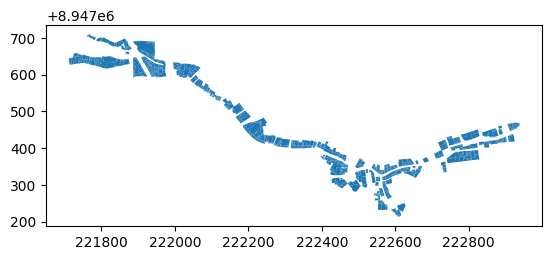

In [115]:
riesgo_shape.plot()

In [116]:
def clasificar_riesgo(riesgo):
    if 0.071 <= riesgo <= 0.209:
        return "MUY ALTA"
    elif 0.021 <= riesgo < 0.071:
        return "ALTA"
    elif 0.006 <= riesgo < 0.021:
        return "MEDIA"
    elif 0.002 <= riesgo < 0.006:
        return "BAJA"
    else:
        return "OTRO VALOR"

In [117]:
riesgo_shape["Nivel Riesgo"] = riesgo_shape["Riesgo"].apply(clasificar_riesgo)
riesgo_shape.head()

,OBJECTID_1_1,PELIGRO,NIV_PEL,N,VULNRB,NIVEL_VULN,geometry,Riesgo,Nivel Riesgo
0,1,0.198934,ALTA,168,0.215,ALTO,"POLYGON ((222282.096 8947409.399, 222282.037 8...",0.042771,ALTA
1,1,0.198934,ALTA,169,0.227,ALTO,"POLYGON ((222278.003 8947410.113, 222277.9 894...",0.045158,ALTA
2,1,0.198934,ALTA,170,0.125,MODERADO,"POLYGON ((222221.012 8947429.438, 222220.732 8...",0.024867,ALTA
3,1,0.198934,ALTA,171,0.194,ALTO,"POLYGON ((222223.016 8947427.684, 222222.81 89...",0.038593,ALTA
4,1,0.198934,ALTA,174,0.193,ALTO,"POLYGON ((222257.585 8947415.691, 222258.577 8...",0.038394,ALTA


## Mpa tematico

In [121]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.4 MB/s eta 0:00:00


In [122]:
import matplotlib.patches as mpatches
import contextily as ctx

In [123]:
distrito_shape =  gpd.read_file("FINAL RECURSOS/Shape/Area_Estudio.shp")
distrito_shape

,Id,geometry
0,0,"POLYGON ((221979.917 8947728.8, 221989.37 8947..."


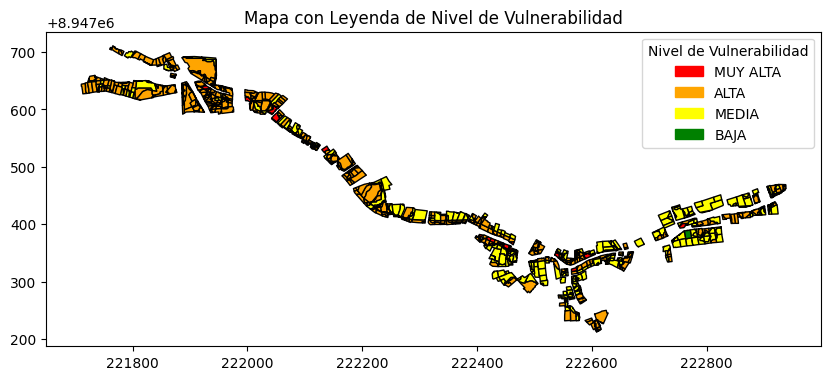

In [120]:
fig, ax = plt.subplots(figsize=(10, 10))

colores = {'MUY ALTA': 'red', 'ALTA': 'orange', 'MEDIA': 'yellow','BAJA': 'green'}

# Graficar el GeoDataFrame con colores según el nivel de vulnerabilidad
riesgo_shape['color'] = riesgo_shape['Nivel Riesgo'].map(colores)
riesgo_shape.plot(ax=ax, color=riesgo_shape['color'], edgecolor='black')

# Crear una leyenda personalizada
handles = [mpatches.Patch(color=color, label=level) for level, color in colores.items()]
ax.legend(handles=handles, title='Nivel de Riesgo', loc='upper right')

# Ajustar el título y mostrar el mapa
ax.set_title('Nivel de Riesgo en Shancayana')
plt.show()

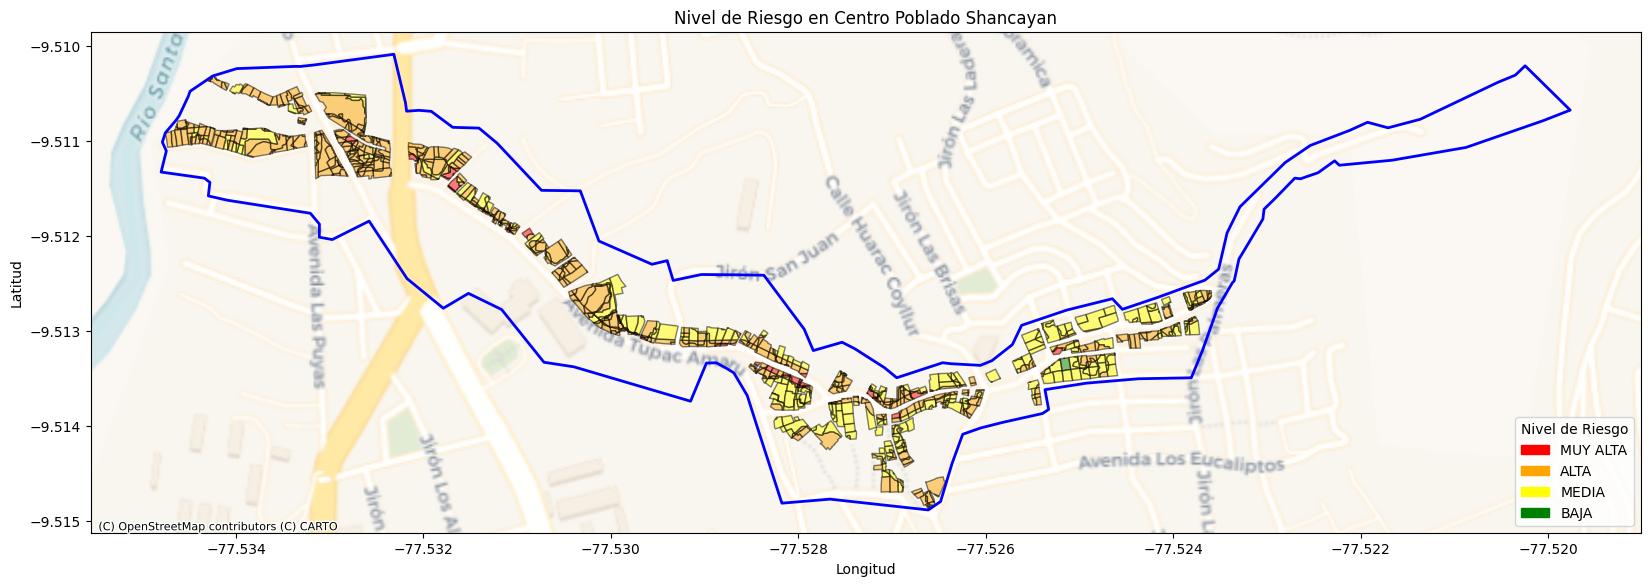

In [139]:
riesgo_shape1 = riesgo_shape.to_crs(epsg=4326)
distrito_shape1 = distrito_shape.to_crs(epsg=4326)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(20, 15))

# Graficar el GeoDataFrame de riesgo con colores según el nivel de riesgo
colores = {'MUY ALTA': 'red', 'ALTA': 'orange', 'MEDIA': 'yellow', 'BAJA': 'green'}
riesgo_shape1['color'] = riesgo_shape1['Nivel Riesgo'].map(colores)
riesgo_shape1.plot(ax=ax, color=riesgo_shape1['color'], edgecolor='black', alpha=0.5)

# Graficar el GeoDataFrame del distrito
distrito_shape1.plot(ax=ax, color='none', edgecolor='blue', linewidth=2)

# Crear una leyenda personalizada
handles = [mpatches.Patch(color=color, label=level) for level, color in colores.items()]
ax.legend(handles=handles, title='Nivel de Riesgo', loc='lower right')

# Ajustar el título y mostrar el mapa
ax.set_title('Nivel de Riesgo en Centro Poblado Shancayan')
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

ctx.add_basemap(ax, crs=distrito_shape1.crs, source=ctx.providers.CartoDB.Voyager)

plt.show()